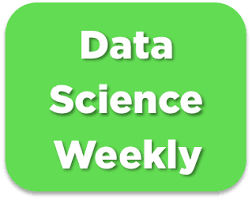

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
pip install plotly -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.linear_model import Ridge


In [3]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [4]:
import seaborn as sns

In [26]:
def sigmoid(x,a,b):
    return 1 / (1 + np.exp(b*(-x+a)))
def der_sigmoid(x,a,b):
    return sigmoid(x,a,b)*(1-sigmoid(x,a,b))


# Read file with labels

In [5]:
data = pd.read_csv('conversion_data_test.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (31620, 5)


In [30]:
data.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [31]:
data.describe(include = 'all')

,country,age,new_user,source,total_pages_visited
count,31620,31620.000000,31620.000000,31620,31620.000000
unique,4,NaN,NaN,3,NaN
top,US,NaN,NaN,Seo,NaN
freq,17968,NaN,NaN,15563,NaN
mean,NaN,30.620746,0.685579,NaN,4.870398
std,NaN,8.316736,0.464292,NaN,3.333128
min,NaN,17.000000,0.000000,NaN,1.000000
25%,NaN,24.000000,0.000000,NaN,2.000000
50%,NaN,30.000000,1.000000,NaN,4.000000
75%,NaN,36.000000,1.000000,NaN,7.000000


## Country

In [35]:
data['country'].value_counts()

US         17968
China       7480
UK          4809
Germany     1363
Name: country, dtype: int64

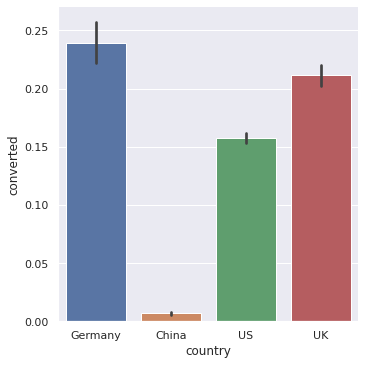

In [340]:
#moyenne de converted en fonction du pays
#px.bar(data,data.country.unique(), data.groupby('country').mean()['converted']*100)
sns.catplot(data = data1, x = 'country', y = 'converted', kind = 'bar')

## Age

In [5]:
np.sort(data['age'].unique())

array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  72,  73,  77,  79, 111, 123])

In [6]:
data = data.loc[data['age']<100,:]

In [7]:
px.histogram(data.age)

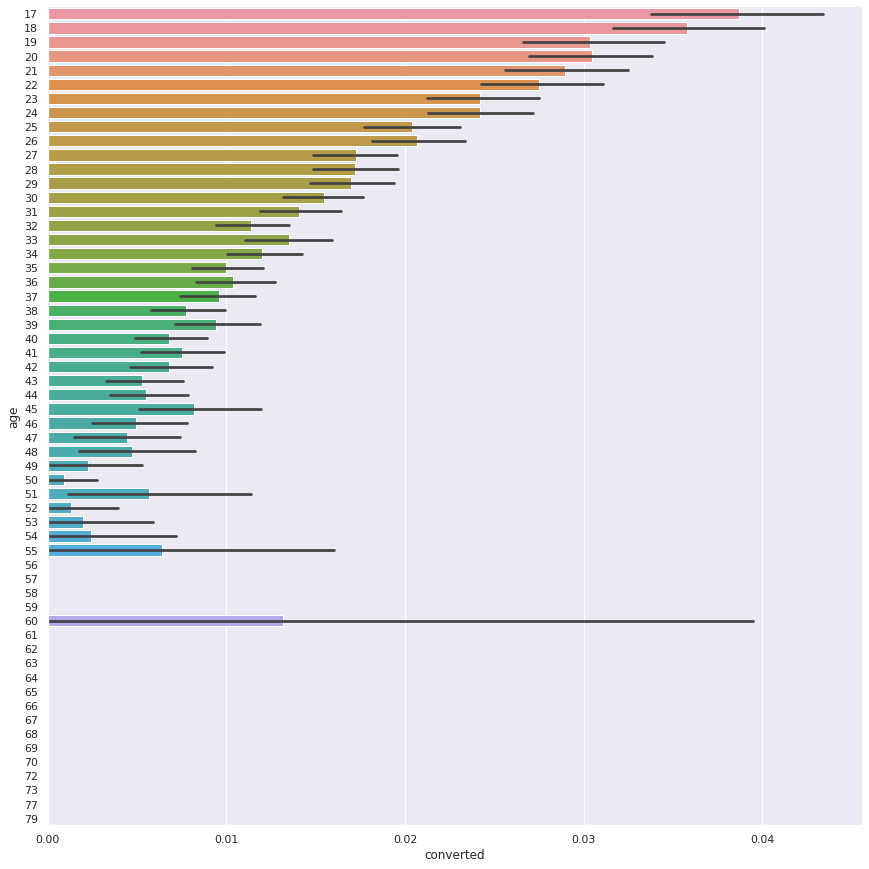

In [298]:
#moyenne de converted en fonction de l'age
sns.catplot(data=data2, y = 'age', x = 'converted', kind = 'bar',orient = 'h',height=12)

In [299]:
print(data1.shape,data2.shape)

(31359, 7) (253219, 7)


## total page visited

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

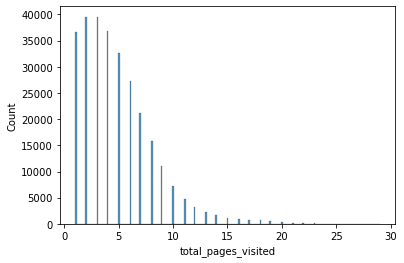

In [35]:
sns.histplot(data.total_pages_visited)

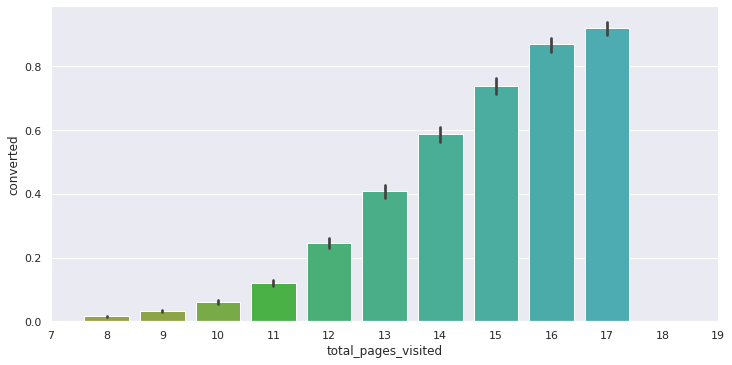

In [323]:
#data.loc[:,['total_pages_visited','converted']].groupby('total_pages_visited').mean()
g = sns.catplot(data = data1, x = data['total_pages_visited'], y = 'converted', kind = 'bar',aspect = 2)
#sns.lineplot(x = r, y = sigmoid(r,12.5,0.8))
#sns.lineplot(x = r, y = 20*der_sigmoid(r,12.5,0.8))
g.set(xlim = (6,18))

In [220]:
ds = np.round(100*sigmoid(r,12.5,0.8),2)

In [221]:
data['pages_mod'] = data.total_pages_visited.apply(lambda x: x+ds[x-1])
data['pages_mod'].unique()

array([  2.01,   3.02,  73.87,   7.55,   4.05,   5.11,   1.  ,  15.73,
         6.25,  22.92, 104.08,  11.66,   9.21,  35.15, 117.79, 119.45,
        91.85, 120.75,  53.13, 122.95, 115.34, 111.27, 121.89, 124.99,
       123.98, 126.  , 127.  , 129.  , 128.  ])

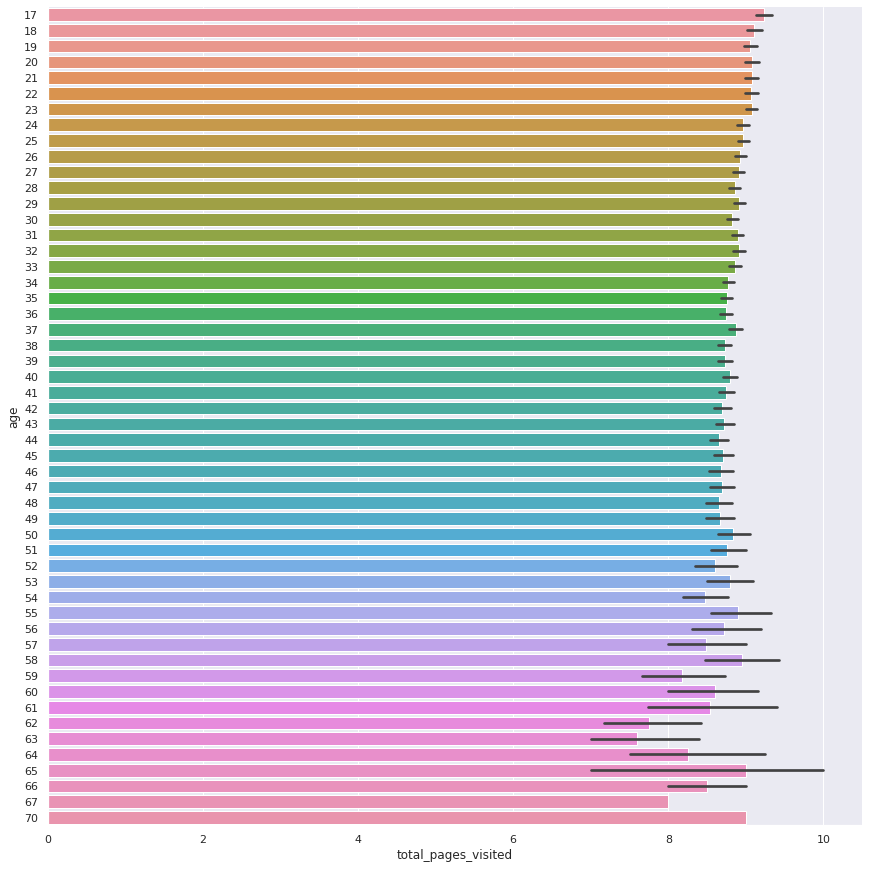

In [313]:
#nb de pages visités en moyenne en fonction de l'age
sns.catplot(data=data1, y = 'age', x = 'total_pages_visited', kind = 'bar', orient = 'h', height = 12)

In [57]:
data.new_user.value_counts()

1    195066
0     89512
Name: new_user, dtype: int64

In [74]:
nu_0 = data.loc[data.new_user == 0, 'converted'].value_counts()
nu_1 = (data.loc[data.new_user == 1, 'converted'].value_counts())
print((nu_1[1]/(nu_1[0]+nu_1[1]))/(nu_0[1]/(nu_0[0]+nu_0[1])))


0.19540029218027952


## Source

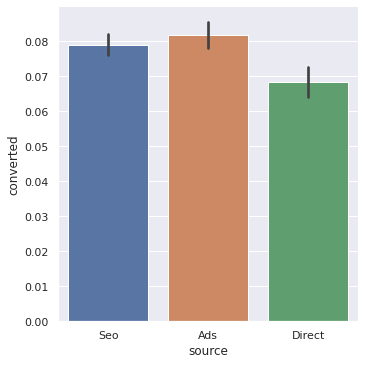

In [312]:
sns.catplot(data=data1, x='source', y='converted', kind = 'bar')

<AxesSubplot:xlabel='source', ylabel='Count'>

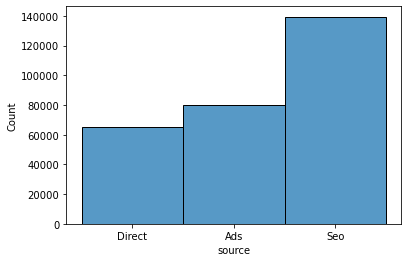

In [85]:
sns.histplot(data.source)

# Make your model

In [8]:
data1 = data.loc[(data['total_pages_visited']<=17) & (data['total_pages_visited']>= 8) & (data['country'] != 'China'),:]
data2 = data.loc[(data['total_pages_visited']>17) | (data['total_pages_visited']< 8) |(data['country'] == 'China'),:]

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [9]:
data.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

In [12]:

features_list = ['country', 'age', 'new_user', 'total_pages_visited', 'source']
#numeric_indices = [0]
#categorical_indices = []
target_variable = 'converted'
features_list

['country', 'age', 'new_user', 'total_pages_visited', 'source']

In [11]:
X = data2.loc[:, features_list]
Y = data2.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

KeyError: 'converted'

In [16]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [17]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['US' 25 1 1 'Ads']
 ['China' 29 1 1 'Seo']
 ['China' 27 1 3 'Seo']
 ['US' 26 1 5 'Seo']
 ['US' 45 1 4 'Seo']]
[['UK' 21 1 6 'Seo']
 ['US' 29 1 2 'Seo']]

[0 0 0 0 0]
[0 0]


In [18]:
X.columns

Index(['country', 'age', 'new_user', 'total_pages_visited', 'source'], dtype='object')

In [19]:
numeric_features = [1,3] 
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = [0] 
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first'))
    ])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## XGBoost

In [21]:
!pip install xgboost -q
from xgboost import XGBRegressor

In [22]:
xgboost = XGBRegressor(max_depth = 6)
xgboost.fit(X_train, Y_train)
print(xgboost.score(X_train, Y_train))
xgboost.score(X_test, Y_test)

0.8432216275207551


0.8052000959688729

In [130]:
Y_train_pred_boost = xgboost.predict(X_train)
Y_test_pred_boost = xgboost.predict(X_test)

In [41]:
Y_test_pred_boost

array([0.10522127, 0.00154768, 0.00136241, ..., 0.00081108, 0.0080563 ,
       0.00114201], dtype=float32)

## Random Forest

In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]         # nombre de division du dataset à tester
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best validation accuracy :  0.917160973614236


In [422]:
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10]         # nombre de division du dataset à tester
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
Best validation accuracy :  0.9984489765130729


In [412]:
#data1
print(gridsearch.best_estimator_.score(X_test,Y_test))
gridsearch.best_estimator_.score(X_train,Y_train)

0.9224948875255624


0.9182973114247404

In [423]:
#data2
print(gridsearch.best_estimator_.score(X_test,Y_test))
gridsearch.best_estimator_.score(X_train,Y_train)

0.9985574271288556


0.998453690870176

## SVM

In [371]:
clf = SVC()
clf.fit(X_train, Y_train)

SVC(C=10)

In [373]:
clf.score(X_test, Y_test)

0.9202453987730062

In [372]:
clf.score(X_train, Y_train)

0.9175018749573873

In [362]:
Y_train_pred_svc = clf.predict(X_train)
Y_test_pred_svc = clf.predict(X_test)

## Training pipeline

In [424]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [425]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [426]:
print(classifier.score(X_train, Y_train))
classifier.score(X_test, Y_test)

0.998448976513073


0.9985574271288556

In [355]:
print(classifier.score(X_train, Y_train), classifier.score(X_test, Y_test))

gsbe.score(X_test, Y_test)

0.9183654916933706 0.9210633946830266


0.9210633946830266

### cross validation

In [397]:
>>> from sklearn.model_selection import GridSearchCV
Lreg = LogisticRegression()
params = {'class_weight': [None, 'balanced']}
gscv = GridSearchCV(estimator = Lreg,param_grid = params,cv=5)
gscv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced']})

In [401]:
gsbe = gscv.best_estimator_
Y_test_pred_gs = gsbe.predict(X_test)
Y_train_pred_gs = gsbe.predict(X_train)
gsbe.score(X_test,Y_test)

0.9210633946830266

## Test pipeline

In [356]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
Y_train_pred = classifier.predict(X_train)

print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [334]:
#print("f1-score on test set with SVM : ", f1_score(Y_test, Y_test_pred_svc))
print("f1-score on train set with linear regression : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set with linear regression : ", f1_score(Y_test, Y_test_pred))
#print("f1-score on test set with grid search : ", f1_score(Y_test, Y_test_pred_gs))

f1-score on train set with linear regression :  0.9205584978334136
f1-score on test set with linear regression :  0.9260869565217391


In [402]:
print("f1-score on train set with SVM : ", f1_score(Y_train, Y_train_pred_gs))
print("f1-score on test set with SVM : ", f1_score(Y_test, Y_test_pred_gs))

print("f1-score on train set with linear regression : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set with linear regression : ", f1_score(Y_test, Y_test_pred))
#print("f1-score on test set with grid search : ", f1_score(Y_test, Y_test_pred_gs))

f1-score on train set with SVM :  0.656136320122535
f1-score on test set with SVM :  0.6695205479452055
f1-score on train set with linear regression :  0.656136320122535
f1-score on test set with linear regression :  0.6695205479452055


In [358]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[36982   971]
 [ 2621  3427]]

Confusion matrix on test set : 
[[4113  105]
 [ 281  391]]



In [44]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred_svc))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred_svc))
print()

Confusion matrix on train set : 
[[247014    846]
 [  3127   5133]]

Confusion matrix on test set : 
[[27439   101]
 [  340   578]]



### Check what's up with wrongly predicted data

In [381]:
#svc_false_train = X_train.loc[Y_train != Y_train_pred_svc,:]
#svc_false_test = X_test.loc[Y_test != Y_test_pred_svc,:]

lreg_false_train = X_train.loc[Y_train != Y_train_pred,:]
lreg_false_test = X_test.loc[Y_test != Y_test_pred,:]

X.columns

Index(['country', 'age', 'new_user', 'total_pages_visited'], dtype='object')

In [385]:
lreg_false_test.loc[lreg_false_test.country == 'china','country'].count()

0

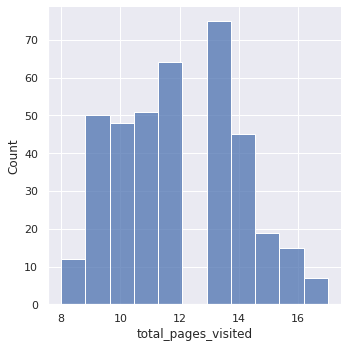

In [387]:
#sns.displot(svc_false_test.total_pages_visited)
sns.displot(lreg_false_test.total_pages_visited)

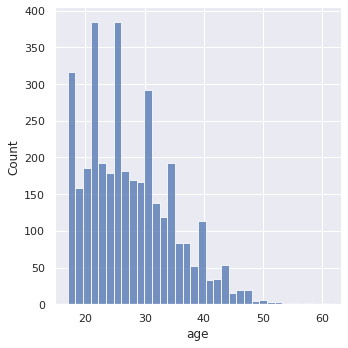

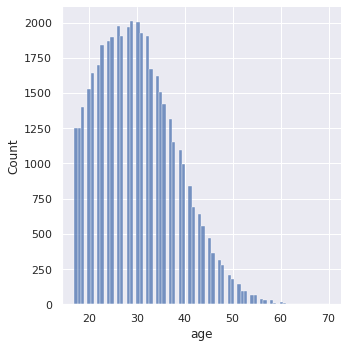

In [389]:
sns.displot(lreg_false_train.age)
sns.displot(X_train.age)

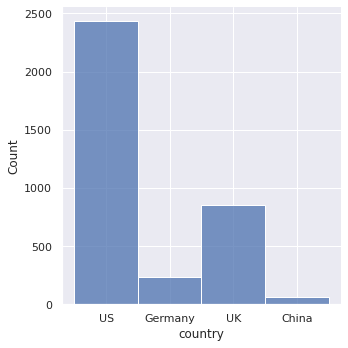

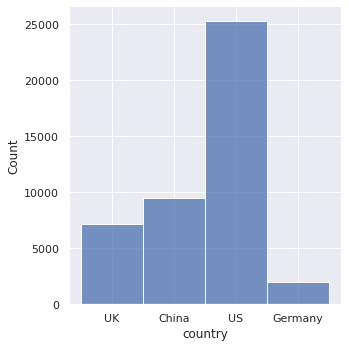

In [390]:
#sns.displot(svc_false_train.country)
sns.displot(lreg_false_train.country)
sns.displot(X_train.country)

**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [16]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [17]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [18]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33326238]
 [ 0.03879562]
 [-1.15919229]
 [ 0.3382926 ]
 [-0.56019834]]


In [19]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**